# Sensitivity Analysis

In [1]:
import os
import sys
import shutil
import math
import warnings
from typing import *
from enum import Enum
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append("/home/esraan/CellDeathSpreading/")

from src.NucleationAndPropagationMeasurements import *
import seaborn as sns
from src.uSpiCalc import uSpiCalc
from src.mixSpiCalc import mixSpiCalc

In [2]:
def simple_treatment(name):
    # if "field" in name.lower():
    #     return "FB"
    if "nec" in name.lower():
        return "Necrosis"
    elif "apop" in name.lower():
        return "Apoptosis"
    else:
        if "_A" in name:
            return "MixedSubApop"
        elif "_N" in name:
            return "MixedSubNec"
        return "MixedColony"

## Calculating Spatail Dynamics Measurments

In [3]:
only_recent_death_flag_for_neighbors_calc = False
# sliding_time_window_size = 20
exps_dir_name = "/home/esraan/CellDeathSpreading/data/mixed_pure_death_minutes_microns"
meta_data_file_full_path= "/home/esraan/CellDeathSpreading/data/csv_files_minutes_microns_live_only_no_apop.csv"#
meta_data_extract_exp_names = pd.read_csv(meta_data_file_full_path)
exp_names = meta_data_extract_exp_names.iloc[:, 1]
meta_data_df = pd.read_csv(meta_data_file_full_path)

final_dataframe = pd.DataFrame()

for neighbors_dist_threshold in (33, 50, 100, 150, 200):
    for sliding_time_window_size in (5, 10, 30, 60, 90, 120):
        p_nucs_by_exp_name = {}
        global_density_by_exp_name = {}
        all_previous_experiments_spi_and_ni_regeneration = calc_all_experiments_SPI_and_NI_for_landscape(
            exp_name=list(exp_names),
            exps_dir_path=exps_dir_name,
            meta_data_full_file_path=meta_data_file_full_path,
            dist_threshold=neighbors_dist_threshold,
            only_recent_death_flag_for_neighbors_calc=only_recent_death_flag_for_neighbors_calc,
            time_unit="minutes",
            sliding_time_window_size=sliding_time_window_size
        )
        reformatting_all_previos_experiments_spi_and_ni_regeneration = {"Experiment_name": [],
                                                                        "SPI": [],
                                                                        "NI": [],
                                                                        "Treatment": [],
                                                                        "Cell Line + Treatment": [],
                                                                        "Cell Line": [],
                                                                        "Origin": [],
                                                                        "Mode": [],
                                                                        "Density": [],
                                                                        "pvalue": [],
                                                                        "sliding_time_window_size": [],
                                                                        "neighbors_dist_threshold": []}
        for key, value in all_previous_experiments_spi_and_ni_regeneration.items():
            if value is None:
                continue
            origin = meta_data_extract_exp_names[meta_data_extract_exp_names["File Name"] == key]["Origin"].values[0]
            mode = meta_data_extract_exp_names[meta_data_extract_exp_names["File Name"] == key]["Mode"].values[0]
            reformatting_all_previos_experiments_spi_and_ni_regeneration["Origin"].append(origin)
            reformatting_all_previos_experiments_spi_and_ni_regeneration["Mode"].append(mode)
            reformatting_all_previos_experiments_spi_and_ni_regeneration["Experiment_name"].append(key)
            exp_cell_line = meta_data_extract_exp_names[meta_data_extract_exp_names["File Name"] == key]["Cell Line"].values[0]
            reformatting_all_previos_experiments_spi_and_ni_regeneration["SPI"].append(value[0])
            reformatting_all_previos_experiments_spi_and_ni_regeneration["NI"].append(value[1])
            reformatting_all_previos_experiments_spi_and_ni_regeneration["pvalue"].append(value[2])
            reformatting_all_previos_experiments_spi_and_ni_regeneration["Cell Line"].append(exp_cell_line)
            reformatting_all_previos_experiments_spi_and_ni_regeneration["Cell Line + Treatment"].append(replace_ugly_long_name(key, exp_cell_line))
            reformatting_all_previos_experiments_spi_and_ni_regeneration["Treatment"].append(simple_treatment(key))
            density = meta_data_extract_exp_names[meta_data_extract_exp_names["File Name"] == key]["Density(#Cells)"].values[0]
            reformatting_all_previos_experiments_spi_and_ni_regeneration["Density"].append(density)
            reformatting_all_previos_experiments_spi_and_ni_regeneration["sliding_time_window_size"].append(sliding_time_window_size)
            reformatting_all_previos_experiments_spi_and_ni_regeneration["neighbors_dist_threshold"].append(neighbors_dist_threshold)
        
        reformatting_all_previos_experiments_spi_and_ni_regeneration_df = pd.DataFrame(reformatting_all_previos_experiments_spi_and_ni_regeneration)
        merged_df = reformatting_all_previos_experiments_spi_and_ni_regeneration_df[reformatting_all_previos_experiments_spi_and_ni_regeneration_df["Origin"] != 'field3_colony']
        # merged_df['segregationIndex'] = merged_df.apply(
        #     lambda row: plot_res_dict.get(row['Origin'], {}).get(row['Mode'].lower(), None),
        #     axis=1
        # )
        final_dataframe = pd.concat([final_dataframe, merged_df], ignore_index=True)

/home/esraan/CellDeathSpreading/src/uSpiCalc.py:26: RuntimeWarning: divide by zero encountered in scalar divide
  self.propagation_index = ((self.scramble_signficance_95 - self.original_difference_death_times) / self.scramble_signficance_95)
/home/esraan/CellDeathSpreading/src/uSpiCalc.py:26: RuntimeWarning: divide by zero encountered in scalar divide
  self.propagation_index = ((self.scramble_signficance_95 - self.original_difference_death_times) / self.scramble_signficance_95)
/home/esraan/CellDeathSpreading/src/uSpiCalc.py:26: RuntimeWarning: divide by zero encountered in scalar divide
  self.propagation_index = ((self.scramble_signficance_95 - self.original_difference_death_times) / self.scramble_signficance_95)
/home/esraan/CellDeathSpreading/src/uSpiCalc.py:26: RuntimeWarning: divide by zero encountered in scalar divide
  self.propagation_index = ((self.scramble_signficance_95 - self.original_difference_death_times) / self.scramble_signficance_95)
/home/esraan/CellDeathSpreading/

In [ ]:
final_dataframe.to_csv("/home/esraan/CellDeathSpreading/results/AllExperimentsSPI&NI&SAupdated.csv", index=False)

## Spatial Propagation Index : sliding time window & neighbors distance threshold

In [7]:
filtered_df = pd.read_csv("/home/esraan/CellDeathSpreading/results/AllExperimentsSPI&NI&SAupdated.csv")

In [8]:
filtered_df = filtered_df[(~filtered_df['Experiment_name'].str.contains('pure|colony|SKT|outl|ROI#2|mixed', case=False, na=False))]#& ~filtered_df['Origin'].str.contains('field14_two_colony'))]
filtered_df

,Experiment_name,SPI,NI,Treatment,Cell Line + Treatment,Cell Line,Origin,Mode,Density,pvalue,sliding_time_window_size,neighbors_dist_threshold
0,field13_crop-001_ROI#1_annotation_apop.csv,0.100299,0.257384,ApoptosisInColonies,MCF10A+field13_crop-001_roi#1_annotation_apop.csv,MCF10A,field13_colony,Apoptosis,237,0.000,5,33
1,field13_crop-001_ROI#1_annotation_nec.csv,0.376201,0.142395,NecrosisInColonies,MCF10A+field13_crop-001_roi#1_annotation_nec.csv,MCF10A,field13_colony,Necrosis,309,0.000,5,33
2,Field14-002_ROI#1_annotation_apop.csv,0.204739,0.239691,ApoptosisInColonies,MCF10A+field14-002_roi#1_annotation_apop.csv,MCF10A,field14_colony,Apoptosis,387,0.000,5,33
3,Field14-002_ROI#1_annotation_nec.csv,0.418797,0.212851,NecrosisInColonies,MCF10A+field14-002_roi#1_annotation_nec.csv,MCF10A,field14_colony,Necrosis,249,0.000,5,33
4,7-20-23_10arednuclei_ROI#10_annotation_apop.csv,-1.199005,0.553191,ApoptosisInColonies,MCF10A+7-20-23_10arednuclei_roi#10_annotation_...,MCF10A,field11_colony,Apoptosis,47,0.761,5,33
...,...,...,...,...,...,...,...,...,...,...,...,...
496,Field14-002_ROI#1_annotation_nec.csv,0.134615,0.220884,NecrosisInColonies,MCF10A+field14-002_roi#1_annotation_nec.csv,MCF10A,field14_colony,Necrosis,249,0.000,120,200
497,7-20-23_10arednuclei_ROI#10_annotation_apop.csv,0.091584,0.170213,ApoptosisInColonies,MCF10A+7-20-23_10arednuclei_roi#10_annotation_...,MCF10A,field11_colony,Apoptosis,47,0.003,120,200
498,7-20-23_10arednuclei_ROI#10_annotation_nec.csv,0.278571,0.225352,NecrosisInColonies,MCF10A+7-20-23_10arednuclei_roi#10_annotation_...,MCF10A,field11_colony,Necrosis,142,0.000,120,200
499,7-20-23_10arednuclei_ROI#13_or14_both_colonies...,0.252824,0.157258,ApoptosisInColonies,MCF10A+7-20-23_10arednuclei_roi#13_or14_both_c...,MCF10A,field14_two_colony,Apoptosis,248,0.000,120,200


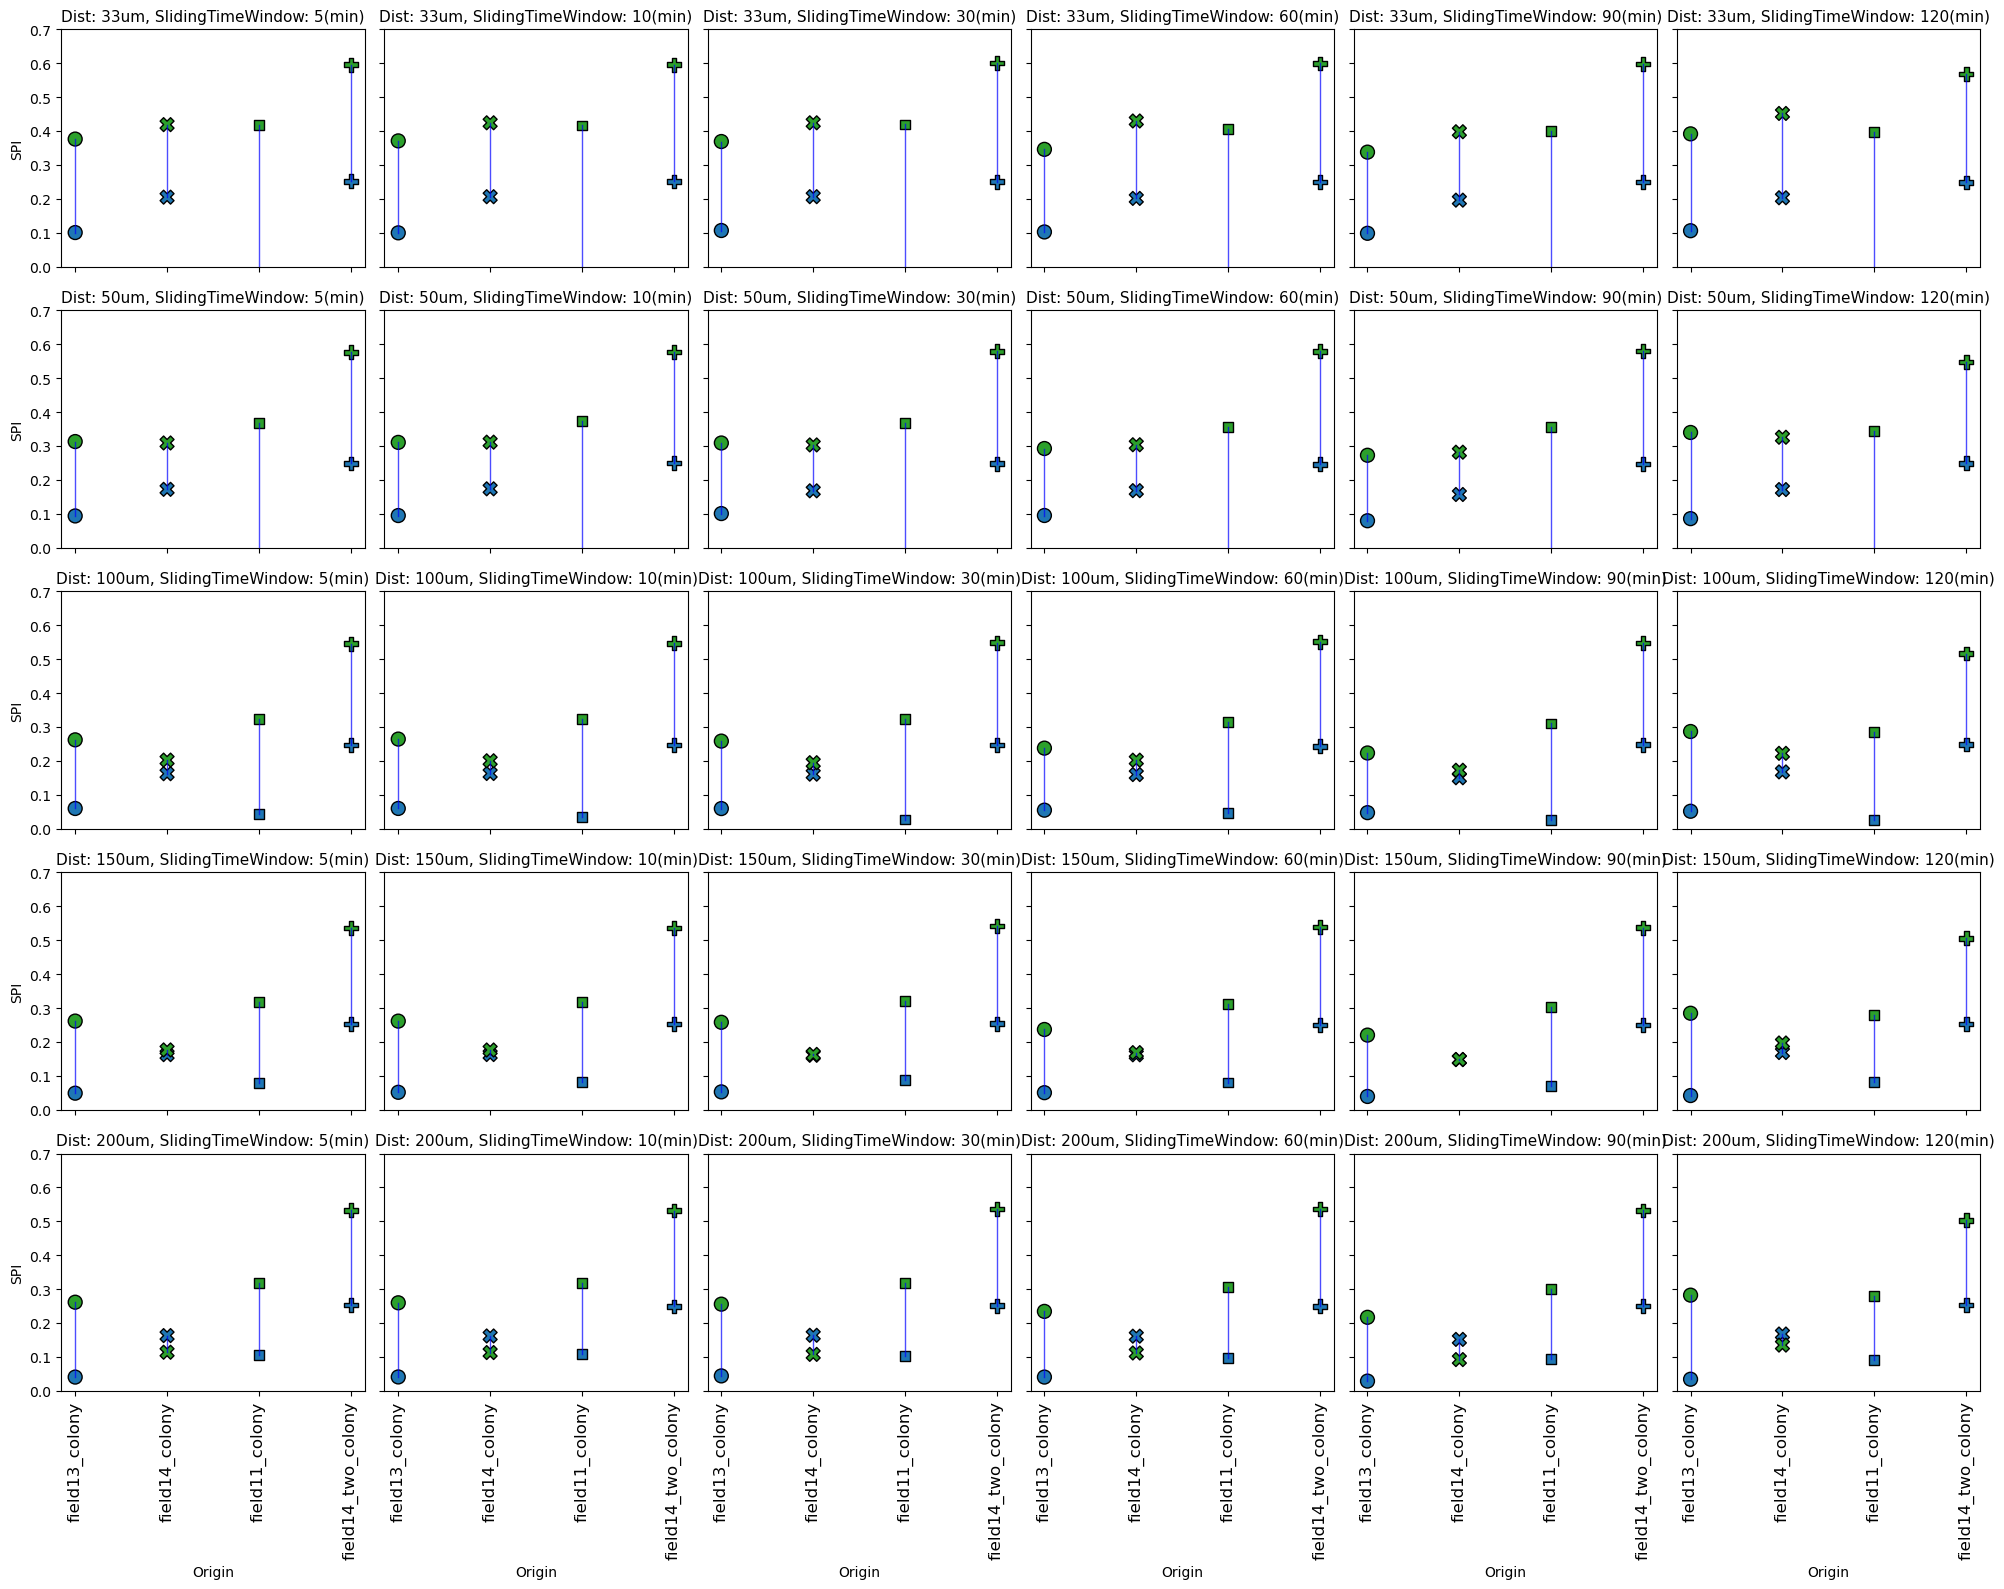

In [12]:
# Define the grid of subplots
# Define the custom palette

custom_palette = {
    'ApoptosisInColonies': "#1f77b4",
    'NecrosisInColonies': "#2ca02c",
    'other': "lightgray"
}
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(20, 16), sharex=True, sharey=True)

# Define the unique distances and sliding time windows
distances = filtered_df['neighbors_dist_threshold'].unique()
sliding_windows = filtered_df['sliding_time_window_size'].unique()

# Sort distances and sliding windows for consistent plotting
distances = sorted(distances)
sliding_windows = sorted(sliding_windows)

# Iterate over distances and sliding windows to create subplots
for i, dist in enumerate(distances):
    for j, window in enumerate(sliding_windows):
        ax = axes[i, j]
        subset = filtered_df[
            (filtered_df['neighbors_dist_threshold'] == dist) &
            (filtered_df['sliding_time_window_size'] == window)
        ]
        
        sns.scatterplot(
            data=subset,
            x="Origin",
            y="SPI",
            hue="Treatment",
            style="Origin",
            palette=custom_palette,
            edgecolor="black",
            linewidth=1,
            s=100,
            ax=ax,
            legend=False  # Suppress legend for all subplots
        )
        
        # Add connecting lines between points from the same origin
        for origin, group in subset.groupby("Origin"):
            ax.plot(group["Origin"], group["SPI"], linestyle='-', linewidth=1, alpha=0.7, color='b', )
        
        # Set subplot title
        ax.set_title(f"Dist: {dist}um, SlidingTimeWindow: {window}(min)", fontsize = 11)
        ax.set_ylim(0, 0.7)
        ax.tick_params(axis='x', labelsize=12, rotation=90)

# Add legend to the last subplot
handles, labels = axes[-1, -1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', frameon=False)
# plt.setp(axes, xticks=filtered_df['Origin'].unique(), xticklabels=filtered_df['Origin'].unique(), fontsize=12, rotation=90, ha='right')
# Adjust layout
plt.tight_layout()
plt.show()


## Spatial Segregation Index: neighbors distance threshold

In [33]:

single_exp_full_paths = '/sise/assafzar-group/assafzar/Esraa/SalJyoPaperFiles/mixed_pure_death_minutes_microns/'#Field14-002_ROI#1_annotation_nec.csv'
new_res = {'7-20-23_10arednuclei_ROI#13_or14_both_colonies_annotation_mixed.csv': 'field14_two_colony',
'Field14-002_ROI#1_annotation_mixed.csv': 'field14_colony',
'7-20-23_10arednuclei_ROI#10_annotation_mixed.csv': "field11_colony",
'field13_crop-001_ROI#1_annotation_mixed.csv': 'field13_colony'}
# Define the distances to iterate over
distances = [33, 50, 100, 150, 200]
custom_palette = {
    'apoptosis': 'blue',
    'necrosis': 'green'
}
# Initialize a dictionary to store results for each distance
results_by_distance = {}

# Iterate over each distance
for dist in distances:
    res = {}
    for idx, file in enumerate(os.listdir(single_exp_full_paths)):
        if '_mixed' not in file:
            continue
        cells_loci, cells_times_of_death = read_experiment_cell_xy_and_death_times(
            exp_full_path=os.path.join(single_exp_full_paths, file)
        )
        exp_full_path = os.path.join(single_exp_full_paths, file)
        csv_file = pd.read_csv(exp_full_path)
        death_modes = csv_file[["Mode"]].values
        segregation_index = SegregationIdx(
            cells_loci, death_modes, 1000, dist, filter_neighbors_by_distance=True, neighbors_level=1, stats_to_calculate="mean"
        )
        seg_res_dict = segregation_index.get_segregation_index()
        res[file] = {key: (value[0] / value[2], value[1]) for key, value in seg_res_dict.items() if key in ('apoptosis', 'necrosis')}
    
    # Map file names to new_res dictionary
    plot_res_dict = {new_res.get(key): value for key, value in res.items()}
    results_by_distance[dist] = plot_res_dict

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


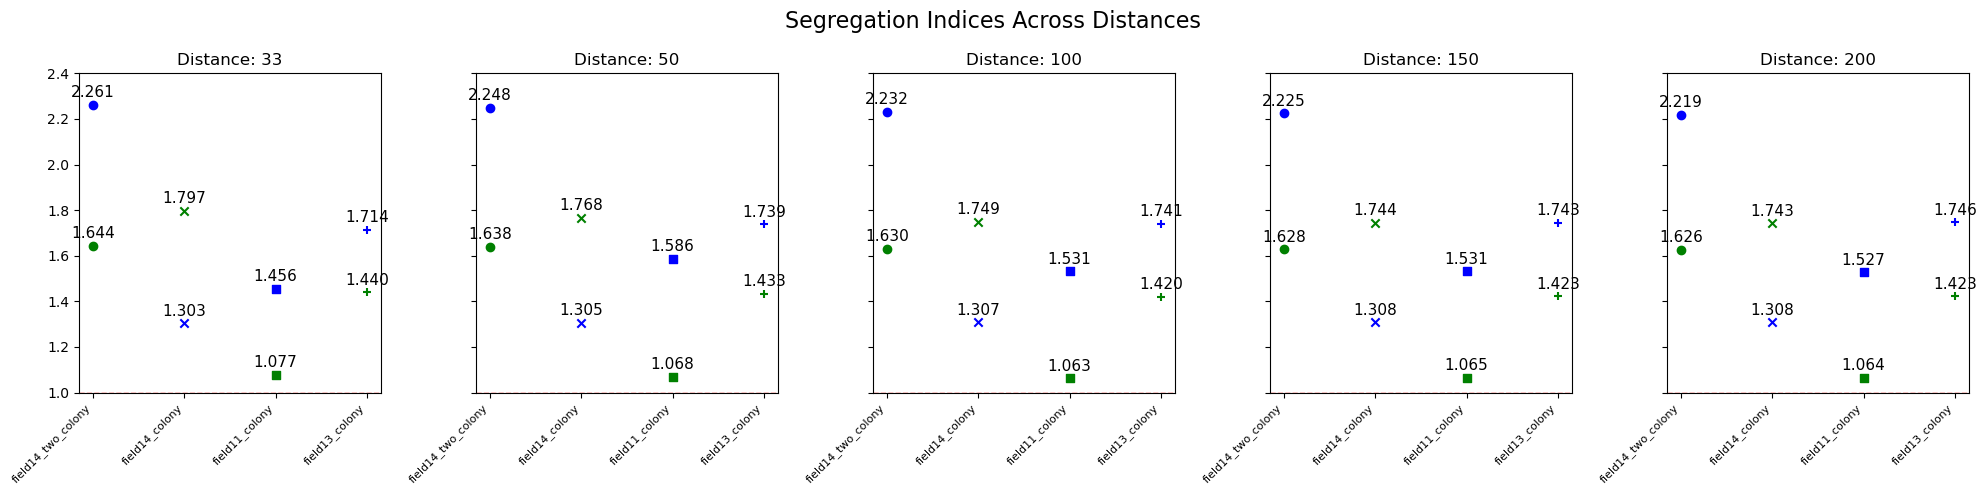

In [34]:

# Plot results for each distance in subplots
fig, axes = plt.subplots(nrows=1, ncols=len(distances), figsize=(20, 5), sharey=True)

for i, dist in enumerate(distances):
    ax = axes[i]
    res = results_by_distance[dist]
    files = list(res.keys())
    modes = list(res[files[0]].keys())
    mode_values = {mode: [res[file][mode] for file in files] for mode in modes}

    markers = ['o', 'x', 's', '+', '^', 'v']
    # colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown']
    # mode_color_dict = 
    file_marker_dict = {file: markers[i % len(markers)] for i, file in enumerate(files)}

    for file_idx, file in enumerate(files):
        for mode in modes:
            # Extract the scalar value for y (first element of the tuple)
            y_value = res[file][mode][0] if isinstance(res[file][mode], tuple) else res[file][mode]
            ax.scatter(file_idx, y_value, marker=file_marker_dict[file], color=custom_palette.get(mode, 'black'))  # Ensure y_value is scalar
            ax.text(file_idx, y_value + 0.02, f"{y_value:.3f}", ha='center', va='bottom', fontsize=11)

    ax.set_xticks(range(len(files)))
    ax.set_xticklabels(files, rotation=45, ha='right', fontsize=8)
    ax.set_title(f"Distance: {dist}", fontsize=12)
    ax.axhline(y=1, color='red', linestyle='--', linewidth=1)
    ax.grid(False)
    ax.set_ylim(1, 2.4)

fig.suptitle("Segregation Indices Across Distances", fontsize=16)
fig.tight_layout()
fig.legend(title="File - Mode", fontsize=10, bbox_to_anchor=(1.05, 0.5), loc='center left').remove()
plt.show()